In [2]:
# --- IMPORTACION DE LIBRERIAS ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# --- CARGA DE DATOS ---
# Asegúrarse de que los archivos estén en la misma carpeta o ajusta la ruta
try:
    df_pob = pd.read_csv('poblacion.csv', low_memory=False)
    df_ing = pd.read_csv('ingresos.csv', low_memory=False)
    print("Datos cargados exitosamente.")
except FileNotFoundError:
    print("Asegúrate de que los archivos CSV están en el directorio correcto.")

Datos cargados exitosamente.


In [4]:
# 2. Inspección inicial
print("\n--- Inspección de población ---")
print(df_pob.info())
print("\n--- Inspección de ingresos ---")
print(df_ing.info())


--- Inspección de población ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309684 entries, 0 to 309683
Columns: 188 entries, folioviv to factor
dtypes: int64(12), object(176)
memory usage: 444.2+ MB
None

--- Inspección de ingresos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397182 entries, 0 to 397181
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   folioviv  397182 non-null  int64  
 1   foliohog  397182 non-null  int64  
 2   numren    397182 non-null  int64  
 3   clave     397182 non-null  object 
 4   mes_1     397182 non-null  object 
 5   mes_2     397182 non-null  object 
 6   mes_3     397182 non-null  object 
 7   mes_4     397182 non-null  object 
 8   mes_5     397182 non-null  object 
 9   mes_6     397182 non-null  object 
 10  ing_1     397182 non-null  int64  
 11  ing_2     397182 non-null  object 
 12  ing_3     397182 non-null  object 
 13  ing_4     397182 non-null  object 
 14  

In [6]:
# Diccionario de Entidades
entidades = {
    '01': 'Aguascalientes', '02': 'Baja California', '03': 'Baja California Sur', 
    '04': 'Campeche', '05': 'Coahuila', '06': 'Colima', '07': 'Chiapas', 
    '08': 'Chihuahua', '09': 'Ciudad de México', '10': 'Durango', '11': 'Guanajuato', 
    '12': 'Guerrero', '13': 'Hidalgo', '14': 'Jalisco', '15': 'México', 
    '16': 'Michoacán', '17': 'Morelos', '18': 'Nayarit', '19': 'Nuevo León', 
    '20': 'Oaxaca', '21': 'Puebla', '22': 'Querétaro', '23': 'Quintana Roo', 
    '24': 'San Luis Potosí', '25': 'Sinaloa', '26': 'Sonora', '27': 'Tabasco', 
    '28': 'Tamaulipas', '29': 'Tlaxcala', '30': 'Veracruz', '31': 'Yucatán', '32': 'Zacatecas'
}

In [7]:
# ==========================================
# PARTE 1: NIÑOS DE 6 A 12 AÑOS
# ==========================================

# Asegurarse de manejar NaNs en las columnas clave y convertirlas a número
# Esto previene errores de comparación con strings o NaNs
df_pob['edad'] = pd.to_numeric(df_pob['edad'], errors='coerce').fillna(-99)
df_pob['nivel'] = pd.to_numeric(df_pob['nivel'], errors='coerce').fillna(-99)
df_pob['asis_esc'] = pd.to_numeric(df_pob['asis_esc'], errors='coerce').fillna(-99)

# Filtramos el rango de edad (6 a 12 años)
ninos = df_pob[(df_pob['edad'] >= 6) & (df_pob['edad'] <= 12)].copy()
total_ninos = len(ninos)
print(f"Total muestra niños 6 a 12: {total_ninos}")

Total muestra niños 6 a 12: 38761


In [8]:
# ========================================================
# PARTE 2: NIÑOS DE 6 A 12 AÑOS QUE ASISTEN A LA PRIMARIA
# ========================================================

#  Aislar a todos los que tienen NIVEL = 6 
nivel_6_data = df_pob[df_pob['nivel'] == 6].copy()
print(f"Total de registros en la encuesta con NIVEL = 6: {len(nivel_6_data)}")

# Revisar las edades de ese grupo
# Mostramos las 10 edades más comunes o el rango de edad
print("\nEdades más comunes en la población con NIVEL = 6:")
print(nivel_6_data['edad'].value_counts().sort_index().head(15)) # Muestra las primeras 15 edades

# Revisar la Asistencia en ese grupo
print("\nValores de ASIS_ESC en la población con NIVEL = 6:")
print(nivel_6_data['asis_esc'].value_counts(dropna=False))

# Filtramos el rango de edad (6 a 12 años)

# 1. Definición de Variables 
EDAD_MIN = 6
EDAD_MAX = 12
ASISTENCIA_SI = 1
NIVEL_PRIMARIA = 6 

# 2. Aplicación del Filtro Final ---
df_primaria = df_pob[
    # Manejo de NaNs: Filtramos solo donde las columnas tienen valores válidos (no -99)
    (df_pob['edad'] != -99) & 
    (df_pob['nivel'] != -99) &
    (df_pob['asis_esc'] != -99) & 
    
    # Aplicación de filtros lógicos
    (df_pob['edad'] >= EDAD_MIN) & 
    (df_pob['edad'] <= EDAD_MAX) & 
    (df_pob['asis_esc'] == ASISTENCIA_SI) & 
    (df_pob['nivel'] == NIVEL_PRIMARIA)
].copy()

total_muestra_primaria = len(df_primaria)

print(f"Registros finales que asisten a Primaria (6-12 años): {total_muestra_primaria}")

# Porcentaje de niños que asisten a primaria

porc_asisten = (total_muestra_primaria / total_ninos) * 100
print(f"Porcentaje que asiste a la escuela: {porc_asisten:.2f}%")

Total de registros en la encuesta con NIVEL = 6: 32819

Edades más comunes en la población con NIVEL = 6:
edad
5      842
6     4974
7     5120
8     5503
9     5507
10    5648
11    4502
12     537
13      98
14      29
15       8
16       9
17       1
18       2
19       1
Name: count, dtype: int64

Valores de ASIS_ESC en la población con NIVEL = 6:
asis_esc
1.0    32819
Name: count, dtype: int64
Registros finales que asisten a Primaria (6-12 años): 31791
Porcentaje que asiste a la escuela: 82.02%


In [9]:
# ================================================================
# PARTE 3: NIÑOS DE 6 A 12 AÑOS QUE HABLAN ALGUNA LENGUA INDIGENA
# ================================================================
# 'hablaind' == 1 (Sí). 'hablaesp' == 2 (No habla español).

# Definición de la Muestra BASE (6 a 12 años, asistan o no) ---
EDAD_MIN = 6
EDAD_MAX = 12

# Aseguramos que las columnas clave sean numéricas y manejamos NaNs
df_pob['edad'] = pd.to_numeric(df_pob['edad'], errors='coerce').fillna(-99)
df_pob['hablaind'] = pd.to_numeric(df_pob['hablaind'], errors='coerce').fillna(-99)
df_pob['hablaesp'] = pd.to_numeric(df_pob['hablaesp'], errors='coerce').fillna(-99)


# Creamos la muestra base, excluyendo NaNs en edad
df_base_ampliada = df_pob[
    (df_pob['edad'] != -99) &
    (df_pob['edad'] >= EDAD_MIN) & 
    (df_pob['edad'] <= EDAD_MAX)
].copy()

total_muestra_ampliada = len(df_base_ampliada)
print(f"Total de niños en el rango de edad 6-12 años: {total_muestra_ampliada}")

# --- 2. Filtro de Monolingües Indígenas en la Muestra Ampliada ---
# Filtro: Habla lengua indígena (hablaind == 1) Y NO habla español (hablaesp == 2)
solo_indigena_ampliado = df_base_ampliada[
    (df_base_ampliada['hablaind'] == 1) & 
    (df_base_ampliada['hablaesp'] == 2)
]

conteo_solo_indigena = len(solo_indigena_ampliado)
porc_indigena_ampliado = (conteo_solo_indigena / total_muestra_ampliada) * 100


# Aseguramos que las columnas sean numéricas para evitar errores de comparación
# Aseguramos que las columnas sean numéricas para evitar errores de comparación
df_primaria['hablaind'] = pd.to_numeric(df_primaria['hablaind'], errors='coerce')
df_primaria['hablaesp'] = pd.to_numeric(df_primaria['hablaesp'], errors='coerce')

# Filtro: Habla lengua indígena (hablaind == 1) Y NO habla español (hablaesp == 2)
solo_indigena = df_primaria[
    (df_primaria['hablaind'] == 1) & 
    (df_primaria['hablaesp'] == 2)
]

conteo_solo_indigena = len(solo_indigena)
total_muestra_primaria = len(df_primaria)

# Cálculo del Porcentaje
porc_indigena = (conteo_solo_indigena / total_muestra_primaria) * 100

print(f"\nNúmero de niños que SOLO hablan lengua indígena (6-12 años, todas las asistencias): {conteo_solo_indigena}")
print(f"Porcentaje de esta muestra: {porc_indigena_ampliado:.2f}%")
print(f"CANTIDAD de niños que SOLO hablan lengua indígena que asisten a la primaria: {conteo_solo_indigena}")
print(f"Porcentaje del total de la muestra de Primaria: {porc_indigena:.2f}%")

Total de niños en el rango de edad 6-12 años: 38761

Número de niños que SOLO hablan lengua indígena (6-12 años, todas las asistencias): 197
Porcentaje de esta muestra: 0.60%
CANTIDAD de niños que SOLO hablan lengua indígena que asisten a la primaria: 197
Porcentaje del total de la muestra de Primaria: 0.62%


In [10]:
# ========================================================
# PARTE 4: NIÑOS DE 6 A 12 AÑOS CON ALGUNA DISCAPACIDAD
# ========================================================

# Definimos las columnas que indican limitación o discapacidad (igual que en el paso anterior)
COLUMNAS_DISCAPACIDAD = ['disc_camin','disc_ver', 'disc_brazo', 'disc_apren', 'disc_oir', 'disc_vest', 'disc_habla', 'disc_acti'] 

# Función robusta para el análisis de discapacidad en cualquier DataFrame
def analizar_discapacidad_enigh(df_input, nombre_muestra):
    
    # 1. Creamos una copia para evitar SettingWithCopyWarning
    df_analisis = df_input.copy()
    
    # 2. Aseguramos que las columnas sean numéricas y manejamos errores (importante para evitar NaNs)
    for col in COLUMNAS_DISCAPACIDAD:
        df_analisis[col] = pd.to_numeric(df_analisis[col], errors='coerce').fillna(-99)

    total_muestra = len(df_analisis)

    # 3. Creamos una bandera booleana: True si la persona tiene AL MENOS una discapacidad (códigos 1 o 2)
    df_analisis['tiene_discapacidad'] = df_analisis[COLUMNAS_DISCAPACIDAD].apply(
        lambda x: x.isin([1, 2]).any(), axis=1
    )

    # 4. Conteo y Cálculo
    conteo = df_analisis['tiene_discapacidad'].sum()
    porc = (conteo / total_muestra) * 100

    return {
        'Muestra': nombre_muestra,
        'Total Registros': total_muestra,
        'Conteo Discapacidad': conteo,
        'Porcentaje (%)': f"{porc:.2f}"
    }

# --- Ejecución del Análisis Dual ---

# Muestra 1: Solo Primaria (Nivel=6)
resultado_primaria = analizar_discapacidad_enigh(df_primaria, "Muestra 1: Primaria (Asistente)")

# Muestra 2: Total 6-12 años (AMPLIADA)
resultado_ampliado = analizar_discapacidad_enigh(df_base_ampliada, "Muestra 2: Total 6-12 Años")

# 5. Mostrar Resultados en una Tabla Comparativa
df_resultados = pd.DataFrame([resultado_primaria, resultado_ampliado])

print("\n---COMPARACIÓN DE RESULTADOS: DISCAPACIDAD---")
print(df_resultados.to_markdown(index=False))


---COMPARACIÓN DE RESULTADOS: DISCAPACIDAD---
| Muestra                         |   Total Registros |   Conteo Discapacidad |   Porcentaje (%) |
|:--------------------------------|------------------:|----------------------:|-----------------:|
| Muestra 1: Primaria (Asistente) |             31791 |                   532 |             1.67 |
| Muestra 2: Total 6-12 Años      |             38761 |                   778 |             2.01 |


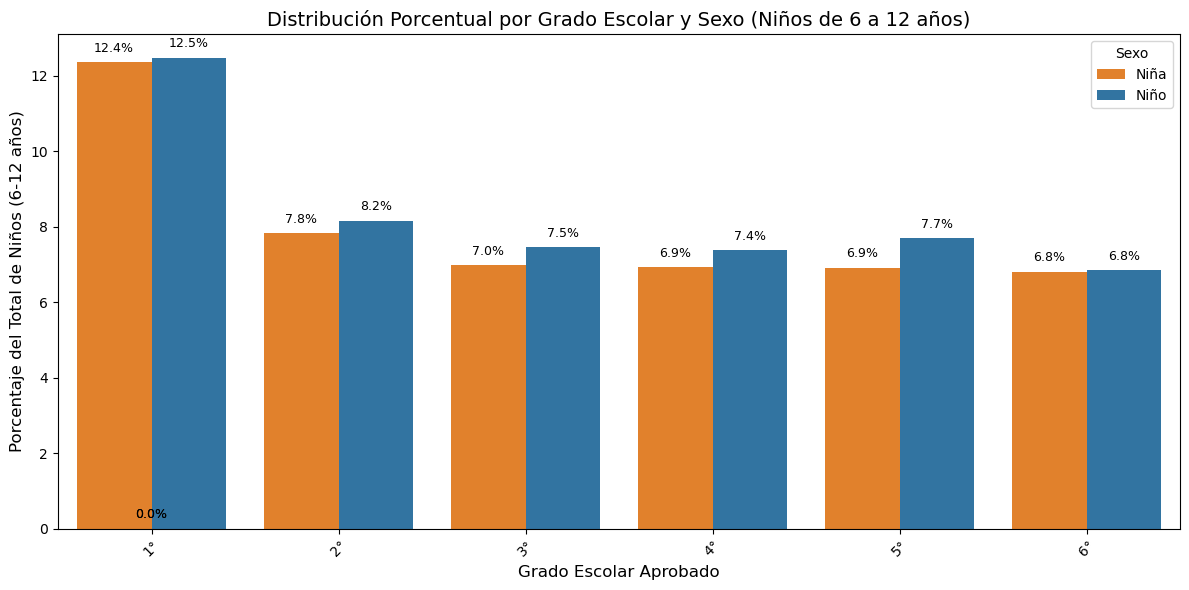

In [11]:
# ========================================================
# PARTE 5: Distribución Porcentual por Grado Escolar y Sexo
# ========================================================

# --- 1. Preprocesamiento de la Muestra Ampliada (Define df_grafica_data) ---

# 1. Aseguramos que las columnas clave sean numéricas y manejamos errores
df_base_ampliada['grado'] = pd.to_numeric(df_base_ampliada['grado'], errors='coerce').fillna(-99)
df_base_ampliada['sexo'] = pd.to_numeric(df_base_ampliada['sexo'], errors='coerce')

# 2. Filtramos grados inválidos (0, -99, etc.) para la gráfica
df_grafica_data = df_base_ampliada[
    (df_base_ampliada['grado'] > 0) & 
    (df_base_ampliada['grado'] != -99)
].copy()

# 3. Mapeo de variables y creación de etiquetas
df_grafica_data['Grado'] = df_grafica_data['grado'].astype(int).astype(str) + '°'
df_grafica_data['Sexo'] = df_grafica_data['sexo'].map({1: 'Niño', 2: 'Niña'})
total_muestra = len(df_base_ampliada) 

# 4. Cálculo de Conteo y Porcentaje (agrupado por Grado y Sexo)
conteo_por_grado_sexo = df_grafica_data.groupby(['Grado', 'Sexo']).size().reset_index(name='Conteo')
conteo_por_grado_sexo['Porcentaje'] = (conteo_por_grado_sexo['Conteo'] / total_muestra) * 100

# --- 2. Generación de la Gráfica con Etiquetas ---

plt.figure(figsize=(12, 6))
grafica = sns.barplot(
    x='Grado', 
    y='Porcentaje', 
    hue='Sexo', 
    data=conteo_por_grado_sexo, 
    palette={'Niño': '#1f77b4', 'Niña': '#ff7f0e'},
    order=sorted(conteo_por_grado_sexo['Grado'].unique(), key=lambda x: int(x[:-1])) # Ordena los grados
)

plt.title('Distribución Porcentual por Grado Escolar y Sexo (Niños de 6 a 12 años)', fontsize=14)
plt.xlabel('Grado Escolar Aprobado', fontsize=12)
plt.ylabel('Porcentaje del Total de Niños (6-12 años)', fontsize=12)
plt.legend(title='Sexo', fontsize=10)

# Añadir etiquetas de porcentaje
for p in grafica.patches:
    grafica.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points',
                     fontsize=9) 

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [12]:
# Definimos las llaves compuestas necesarias para vincular personas con sus ingresos
llaves_merge = ['folioviv', 'foliohog', 'numren']

# Realizamos la fusión (merge)
# how='left' asegura que ninguna persona de df_pob se pierda
df_unido = pd.merge(
    df_pob, 
    df_ing, 
    on=llaves_merge, 
    how='left', 
    suffixes=('_pob', '_ing')
)

print(f"✅ Fusión completada. El nuevo DataFrame 'df_unido' tiene {len(df_unido)} filas.")
print("Ahora, cada persona de la población tiene sus columnas de ingresos adjuntas (si existen).")

✅ Fusión completada. El nuevo DataFrame 'df_unido' tiene 501722 filas.
Ahora, cada persona de la población tiene sus columnas de ingresos adjuntas (si existen).


In [13]:
# ========================================================
# PARTE 6: PORCENTAJE MUJERES CON BECA
# ========================================================
COLUMNA_BECA = 'tiene_b' 

# 1. Filtramos a los estudiantes (asin_esc == 1)
# Aseguramos que 'asin_esc' sea numérico y manejamos NaNs/Códigos
df_unido[COLUMNA_BECA] = pd.to_numeric(df_unido[COLUMNA_BECA], errors='coerce')
df_unido['asis_esc'] = pd.to_numeric(df_unido['asis_esc'], errors='coerce').fillna(-99)
df_estudiantes = df_unido[df_unido['asis_esc'] == 1].copy()

# 2. Filtramos, de esos estudiantes, a quienes recibieron un monto (> 0) de la beca
# Usamos fillna(0) para tratar a quienes no tienen registro de beca como si tuvieran 0
df_beneficiarios = df_estudiantes[
    df_estudiantes[COLUMNA_BECA].fillna(0) > 0 
].copy()

total_beneficiarios = len(df_beneficiarios)

# 3. Calculamos el porcentaje de mujeres (sexo == 2)
df_beneficiarios['sexo'] = pd.to_numeric(df_beneficiarios['sexo'], errors='coerce')

mujeres_beneficiarias = df_beneficiarios[df_beneficiarios['sexo'] == 2]
conteo_mujeres = len(mujeres_beneficiarias)

porc_mujeres = (conteo_mujeres / total_beneficiarios) * 100

print(f"Total de estudiantes beneficiarios de la beca: {total_beneficiarios}")
print(f"2a. Porcentaje de mujeres beneficiarias: {porc_mujeres:.2f}%")

Total de estudiantes beneficiarios de la beca: 97418
2a. Porcentaje de mujeres beneficiarias: 49.78%


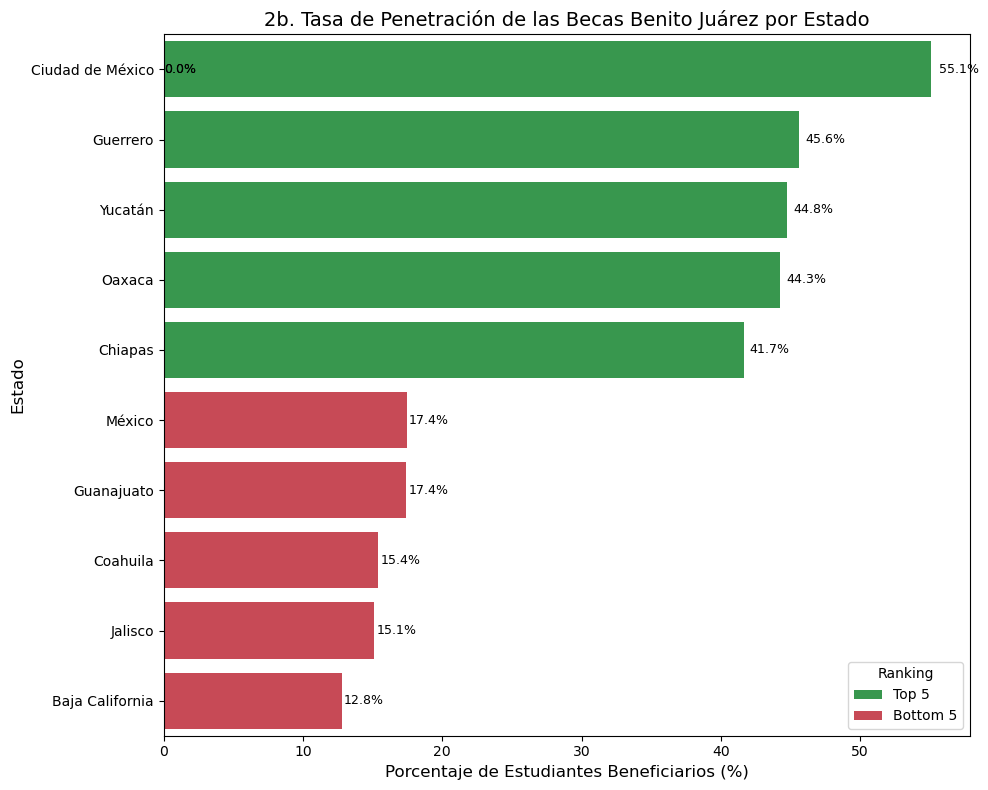

In [14]:
# ========================================================
# PARTE 6: TASA DE PENETRACIÓN BECA BENITO JUAREZ
# ========================================================

COLUMNA_ESTADO = 'entidad_pob' 
COLUMNA_BECA = 'tiene_b' # <--- USAMOS 'tiene_b' (La variable de apoyo más probable)
# La columna 'ing_tri' se usará en el siguiente paso (2c)

# Mapeo de códigos de entidad
mapa_estados = {1: 'Aguascalientes', 2: 'Baja California', 3: 'Baja California Sur', 4: 'Campeche', 5: 'Coahuila', 6: 'Colima', 7: 'Chiapas', 8: 'Chihuahua', 9: 'Ciudad de México', 10: 'Durango', 11: 'Guanajuato', 12: 'Guerrero', 13: 'Hidalgo', 14: 'Jalisco', 15: 'México', 16: 'Michoacán', 17: 'Morelos', 18: 'Nayarit', 19: 'Nuevo León', 20: 'Oaxaca', 21: 'Puebla', 22: 'Querétaro', 23: 'Quintana Roo', 24: 'San Luis Potosí', 25: 'Sinaloa', 26: 'Sonora', 27: 'Tabasco', 28: 'Tamaulipas', 29: 'Tlaxcala', 30: 'Veracruz', 31: 'Yucatán', 32: 'Zacatecas'}

# --- RE-DEFINICIÓN DE DATAFRAMES CON LA NUEVA COLUMNA DE BECA ---

# 1. Re-filtrar TODOS los estudiantes (asumiendo 'asin_esc' ya es numérico)
df_estudiantes = df_unido[df_unido['asis_esc'] == 1].copy()

# 2. Limpiar y re-filtrar BENEFICIARIOS (usando tiene_b)
# El valor 1 en tiene_b indica que sí recibe el beneficio.
df_unido[COLUMNA_BECA] = pd.to_numeric(df_unido[COLUMNA_BECA], errors='coerce').fillna(0)
df_beneficiarios = df_estudiantes[
    df_estudiantes[COLUMNA_BECA] == 1
].copy()


# --- CÁLCULO Y GRAFICACIÓN ---

# 3. Aseguramos que la columna de estado sea numérica y entera
df_estudiantes[COLUMNA_ESTADO] = pd.to_numeric(df_estudiantes[COLUMNA_ESTADO], errors='coerce').fillna(-99).astype(int)
df_beneficiarios[COLUMNA_ESTADO] = pd.to_numeric(df_beneficiarios[COLUMNA_ESTADO], errors='coerce').fillna(-99).astype(int)

# 4. Conteo de Total de Estudiantes y Beneficiarios por Estado
total_estudiantes_por_ent = df_estudiantes.groupby(COLUMNA_ESTADO).size().reset_index(name='Total_Estudiantes')
total_beneficiarios_por_ent = df_beneficiarios.groupby(COLUMNA_ESTADO).size().reset_index(name='Beneficiarios')

# 5. Fusión y Cálculo del Porcentaje
df_ranking = pd.merge(total_estudiantes_por_ent, total_beneficiarios_por_ent, on=COLUMNA_ESTADO, how='left').fillna(0)
df_ranking['Porcentaje_Beneficiarios'] = df_ranking.apply(
    lambda row: (row['Beneficiarios'] / row['Total_Estudiantes']) * 100 if row['Total_Estudiantes'] > 0 else 0, 
    axis=1
)

# 6. FILTRO CRÍTICO: Eliminamos códigos de estado fuera del rango 1-32
df_ranking = df_ranking[
    (df_ranking[COLUMNA_ESTADO] >= 1) & 
    (df_ranking[COLUMNA_ESTADO] <= 32)
].copy()

# 7. Asignar nombres de estado y seleccionar Top/Bottom 5
df_ranking['Estado'] = df_ranking[COLUMNA_ESTADO].map(mapa_estados)

df_ranking_sorted = df_ranking.sort_values(by='Porcentaje_Beneficiarios', ascending=False)
df_top_5 = df_ranking_sorted.head(5)
df_bottom_5 = df_ranking_sorted.tail(5)
df_plot = pd.concat([df_top_5, df_bottom_5])

# --- Generación de la Gráfica ---
colores_mapeados = {'Top 5': '#28a745', 'Bottom 5': '#dc3545'} 
etiquetas = ['Top 5'] * 5 + ['Bottom 5'] * 5
df_plot['Grupo'] = etiquetas

plt.figure(figsize=(10, 8))
grafica = sns.barplot(
    x='Porcentaje_Beneficiarios', 
    y='Estado', 
    data=df_plot.sort_values(by='Porcentaje_Beneficiarios', ascending=False),
    palette=colores_mapeados,
    hue='Grupo', 
    dodge=False 
)

plt.title('2b. Tasa de Penetración de las Becas Benito Juárez por Estado', fontsize=14)
plt.xlabel('Porcentaje de Estudiantes Beneficiarios (%)', fontsize=12)
plt.ylabel('Estado', fontsize=12)
plt.legend(title='Ranking', loc='lower right')

for p in grafica.patches:
    grafica.annotate(f'{p.get_width():.1f}%', 
                     (p.get_width() * 1.01, p.get_y() + p.get_height() / 2), 
                     ha = 'left', va = 'center',
                     fontsize=9) 

plt.tight_layout()
plt.show()

In [15]:
# ========================================================
# PARTE 7: FOCALIZACIÓN DE LA BECA
# ========================================================

# 1. Limpieza de la columna de asistencia escolar y creación de df_estudiantes_final
# Se asume que 'asis_esc' es la columna de asistencia a la escuela y 1 es 'sí asiste'.
df_unido['asis_esc'] = pd.to_numeric(df_unido['asis_esc'], errors='coerce').fillna(0)

# 2. Creación del DataFrame final de estudiantes
df_estudiantes_final = df_unido[df_unido['asis_esc'] == 1].copy()

print("✅ df_estudiantes_final ha sido definido y contiene solo estudiantes.")

# 🚨 Variables clave
COLUMNA_INGRESO = 'ing_tri'

# 4. Aseguramos la limpieza de la columna de ingreso en el DataFrame completo de estudiantes
df_estudiantes_final[COLUMNA_INGRESO] = pd.to_numeric(df_estudiantes_final[COLUMNA_INGRESO], errors='coerce')

# 5. Mediana de Ingreso del Grupo de Beneficiarios (Valor que ya obtuviste)
mediana_beneficiarios = 1643.47 # Usamos el valor previamente calculado

# 3. Mediana de Ingreso del Grupo TOTAL DE ESTUDIANTES (PROXY de la población general)
mediana_estudiantes_total = df_estudiantes_final[COLUMNA_INGRESO].median()


# 6. Resultados
print("\n--- 💰 COMPARACIÓN FINAL DE INGRESOS  ---")
print(f"Mediana de Ingreso del Hogar (Beneficiarios de la Beca): ${mediana_beneficiarios:,.2f}")
print(f"Mediana de Ingreso del Hogar (Total de Estudiantes - PROXY): ${mediana_estudiantes_total:,.2f}")

# 7. Conclusión
if mediana_beneficiarios < mediana_estudiantes_total:
    print("\n✅ CONCLUSIÓN FINAL: La mediana de ingreso de los hogares beneficiarios es MENOR que la del total de la población estudiantil. El programa muestra **tendencia a la focalización**.")
elif mediana_beneficiarios > mediana_estudiantes_total:
    print("\n⚠️ CONCLUSIÓN FINAL: La mediana de ingreso de los hogares beneficiarios es MAYOR que la del total de la población estudiantil. Esto podría sugerir **fuga de apoyo** a segmentos con ingresos medios.")
else:
    print("\n➖ CONCLUSIÓN FINAL: Las medianas son iguales.")

✅ df_estudiantes_final ha sido definido y contiene solo estudiantes.

--- 💰 COMPARACIÓN FINAL DE INGRESOS  ---
Mediana de Ingreso del Hogar (Beneficiarios de la Beca): $1,643.47
Mediana de Ingreso del Hogar (Total de Estudiantes - PROXY): $1,907.60

✅ CONCLUSIÓN FINAL: La mediana de ingreso de los hogares beneficiarios es MENOR que la del total de la población estudiantil. El programa muestra **tendencia a la focalización**.
